In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [6]:
data=pd.read_csv("Ecommerce Customers")

In [7]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


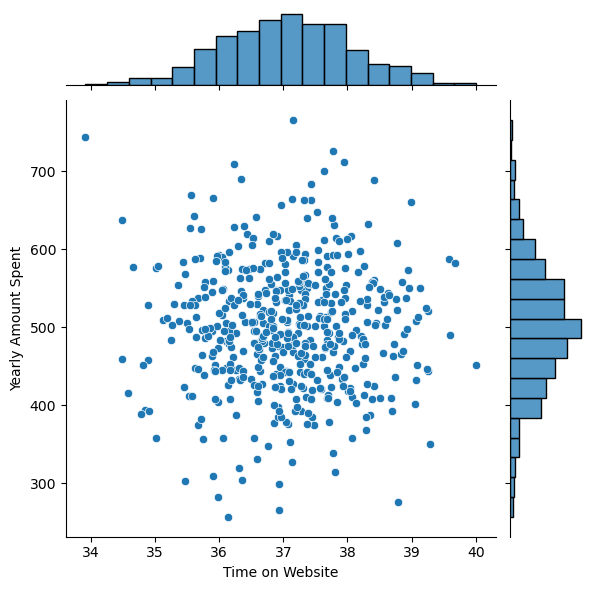

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data,kind='scatter')

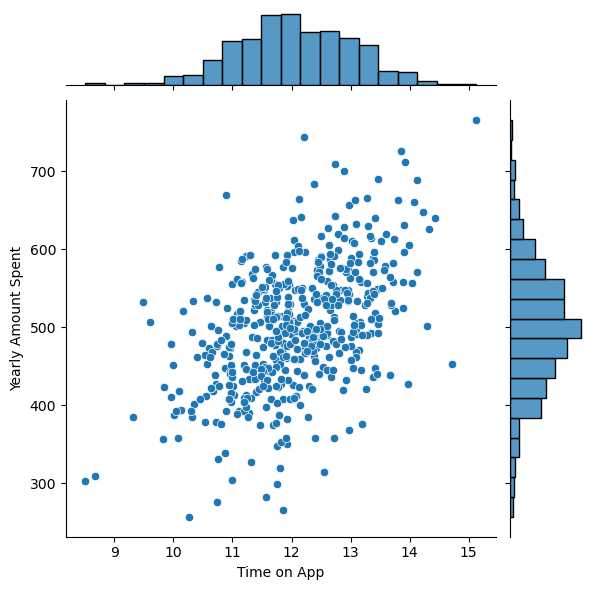

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,kind='scatter')

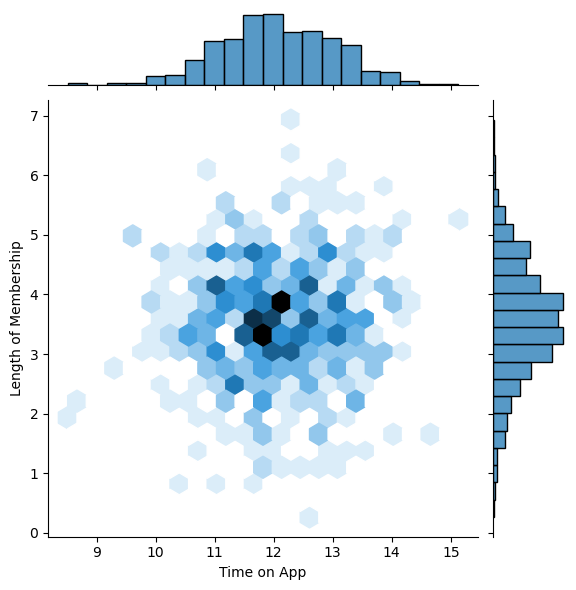

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',data=data,kind='hex')

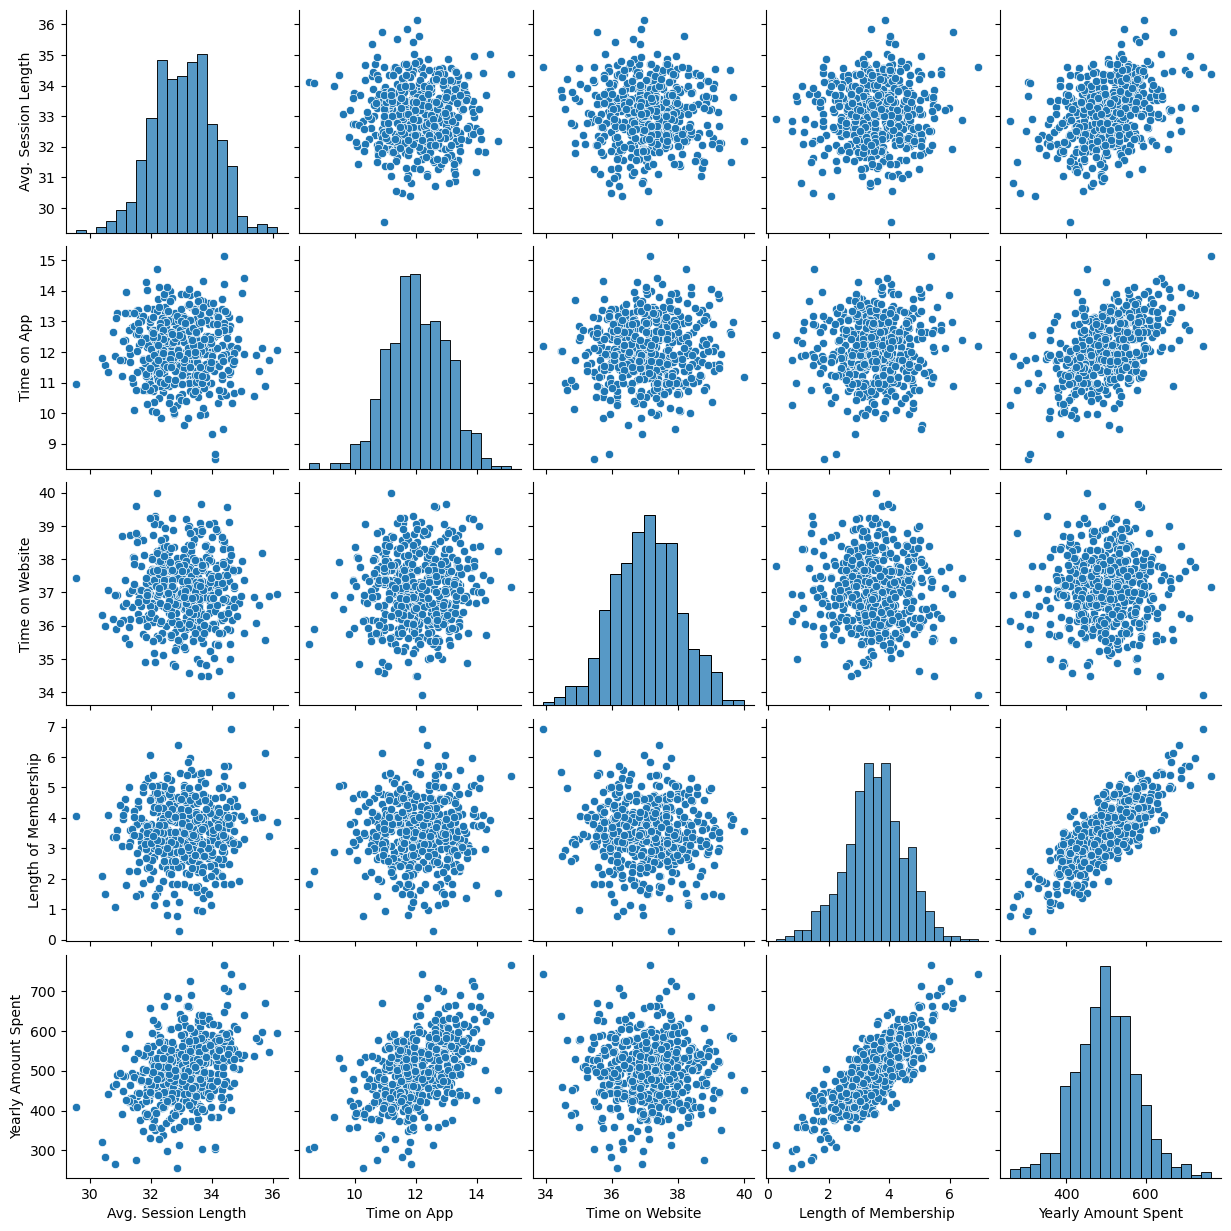

In [15]:
sns.pairplot(data)

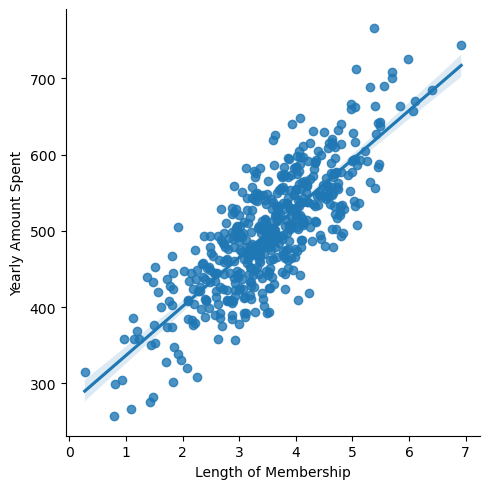

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [17]:
X=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=data['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm= LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
lm.intercept_

-1047.9327822502394

In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [33]:
pridiction=lm.predict(X_test)

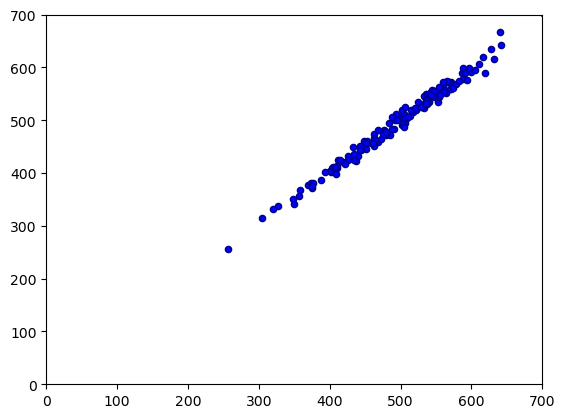

In [46]:
plt.ylim(0,700)
plt.xlim(0,700)
plt.scatter(y_test,pridiction,color='blue',edgecolors='darkblue',s=20)


In [55]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, pridiction))
print('MSE:', metrics.mean_squared_error(y_test, pridiction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pridiction)))

MAE: 7.2281486534308295
MSE: 79.81305165097444
RMSE: 8.933815066978633


C:\Users\rajit\AppData\Local\Temp\ipykernel_16116\590589478.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Yearly Amount Spent'])


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

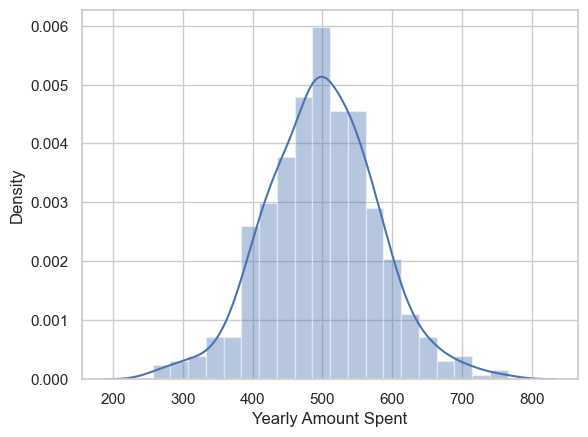

In [60]:
sns.set(style="whitegrid")
sns.distplot(data['Yearly Amount Spent'])